# Analisis Game Berpotensial Ice

Menganalisis data yang mencakup ulasan pengguna dan ahli game, genre, platform, serta data historis penjualan game dari sumber terbuka, kami bertujuan untuk mengidentifikasi pola-pola yang menentukan keberhasilan suatu permainan. Dengan pemahaman ini, kami dapat mengidentifikasi dan memilih game dengan potensi terbesar, serta merencanakan kampanye iklan yang efektif untuk toko daring kami, "Ice", yang menjual video game dari seluruh dunia.

# Daftar Isi

* [Tujuan](#)
    * [Hipotesis](#)
    * [Tahapan](#)
* [1. Pra-pemrosesan Data](#)
    * [1.1. Memuat Data](#)
    * [1.2. Mengeksplorasi Data Awal](#)
    * [Kesimpulan dan Langkah-Langkah Selanjutnya](#)
        * [Gaya Penulisan](#)
        * [Nilai yang Hilang](#)
        * [Gaya Penulisan](#)
        * [Duplikat](#)
        * [Anomali Data](#)
    * [1.3. Memperbaiki Penulisan Judul](#)
    * [1.4. Mengatasi Nilai-Nilai yang Hilang](#)
    * [1.5. Memperbaiki Tipe Data](#)
    * [1.6. Memperbaiki Kualitas Data](#)
* [2. Analisis Data Exploratif (EDA)](#)
    * [2.1. Memeriksa Data yang Sudah Bersih](#)
    * [2.2. Mempelajari parameter Inti](#)
    * [2.3. Penjualan Berdasarkan Platform](#)
    * [2.4. Penjualan Terbanyak pada Tahun 2013-2016](#)
    * [2.5. Penjualan Global Semua Game Berdasarkan Platform Pada Tahun 2013-2016](#)
    * [2.6. Korelasi Penjualan dan Ulasasn Pada Tahun 2013-2016](#)
    * [2.7. Analisis Distribusi Game Berdasarkan Genre pada Tahun 2013-2016](#)
    * [2.8. Profil Pengguna Wilayah (NA, EU, JP) Pada Tahun 2013-2016](#)
* [3. Analisis Data Statistik (Hypothesis Testing](#)
    * [3.1. Menguji Hipotesis](#)
* [Kesimpulan Umum](#)
    * [A. Pra-pemrosesan](#)
    * [B. Analisis Data Exploratif (EDA)](#)
    * [C. Analisis Data Statistik (Hypothesis Testing)](#)

## Tujuan

Proyek ini berfokus pada analisis penjualan game dengan melakukan pre-processing data, EDA, visualisasi data, dan analisis statistik untuk Hypothesis Testing. Data yang digunakan diambil pada Desember 2016. Hasil analisis akan menjadi acuan untuk perencanaan tahun 2017.

### Hipotesis

1. Rata-rata rating pengguna pada platform Xbox One dan PC memiliki nilai yang sama."
2. Rata-rata rating pengguna pada genre Action dan Sports memiliki perbedaan yang signifikan.

### Tahapan

Sebelum menguji hipotesis, perlu dilakukan pemeriksaan kualitas data yang terdapat dalam file `/datasets/games_us.csv.`

Proyek ini terdiri dari tiga tahap:

1. Pra-pemrosesan Data
2. Analisis Data Exploratif (EDA)
3. Analisis Data Statistik (Hyphothesis Testing)


## 1. Pra-pemrosesan Data

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

### 1.1. Memuat Data

In [2]:
# Try and except datasets
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv') 

data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 1.2. Mengeksplorasi Data Awal

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Deskripsi data:**

* `Name` — nama game
* `Platform` — nama platform game dapat dimainkan
* `Genre` — jenis game
* `NA_sales` — penjualan di Amerika Utara dalam satuan juta USD
* `EU_sales` — penjualan di Eropa dalam satuan juta USD
* `JP_sales` — penjualan di Jepang dalam satuan juta USD
* `Other_sales` — penjualan di negara lainnya dalam satuan juta USD
* `Critic_Score` — skor ulasan dari kritikus, maksimal 100
* `User_Score` — skor ulasan dari pengguna, maksimal 10
* `Rating` — Entertainment Software Rating Board (ESRB)

In [4]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Kesimpulan sementara:**

* Nama kolom tidak huruf kecil.
* Terlihat ada beberapa nilai yang hilang.
* Untuk meningkatkan kebersihan Kolom `Year_of_Release`, lebih baik menggunakannya dalam format integer

In [5]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [6]:
# Check unique data from 'User_Score' column
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
# Check duplicated data
data.duplicated().sum()

0

**Kesimpulan sementara:**

* Kehilangan nilai dalam kolom `Critic_Score`, `Rating`, `User_Score`, `Year_of_Release`, `Name`, dan `Genre` perlu dianalisis dengan seksama.
* Kehadiran nilai TBD dalam kolom `User_Score` merupakan sebuah anomali yang memerlukan analisis lebih lanjut.
* Dataset ini tidak mengandung duplikat dalam data-datanya.

In [8]:
# Calculating some statistical data 
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Kesimpulan sementara:**

* Adanya nilai yang tidak wajar pada kolom sales, seperti nilai minimum dan persentil ke-25 yang bernilai 0.000000, memerlukan analisis yang lebih mendalam.

### Kesimpulan dan Langkah-Langkah Selanjutnya

#### Gaya Penulisan Judul

Untuk mempermudah analisis, nama kolom akan diubah menjadi huruf kecil.

#### Nilai yang Hilang

Setiap baris dalam tabel berisi data penjualan game beserta informasi terkait seperti tahun rilis, platform, dan genre game. Selain itu, terdapat juga informasi mengenai penjualan di Amerika, Eropa, Jepang, dan negara-negara lain, serta nilai ulasan kritikus dan pengguna, dan rating game tersebut.

Meskipun data yang kita miliki cukup untuk menguji hipotesis, namun terdapat nilai-nilai yang hilang dalam dataset ini.

* Setiap nilai hilang akan diuji terlebih dahulu persentase terhadap total data, kemudian akan diperiksa apakah ada pola yang terkait. Tindakan yang perlu dilakukan untuk mengatasi nilai-nilai hilang tersebut akan ditentukan berdasarkan hasil analisis tersebut.

Pemahaman alasan di balik hilangnya data sangat penting untuk mempelajarinya dan mencoba memperbaikinya. Namun, sayangnya, dalam proyek ini kita belum memiliki kesempatan untuk melakukan hal tersebut.

#### Gaya Penulisan

Setelah mengatasi nilai-nilai yang hilang, langkah selanjutnya yaitu merapihkan data:

* Kolom `Year_of_Release` akan diubah menjadi tipe data integer untuk mempermudah analisis.
* Dibuatlah kolom baru untuk menghitung total penjualan game dengan menjumlahkan penjualan di semua wilayah.

#### Duplikat

Dataset ini tidak mengandung duplikat data, sehingga tidak perlu dilakukan analisis awal terkait duplikat.

#### Anomali Data

Setelah memeriksa adanya data duplikat, perlu juga mempertimbangkan data anomali berikutnya yang dapat mempengaruhi analisis penelitian.

* Dalam kolom `User_Score` terdapat nilai yang tidak wajar, yaitu TBD.

### 1.3. Memperbaiki Penulisan Judul

In [9]:
# Check the name of columns
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [10]:
# Renaming the columns
data = data.rename(columns=str.lower)

In [11]:
# checking columns
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 1.4. Mengatasi Nilai-Nilai yang Hilang

In [12]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

**Langkah pertama** dalam penanganan nilai-nilai yang hilang adalah menghitung persentasenya dan membandingkannya dengan keseluruhan data untuk mengetahui dampak yang diakibatkan oleh nilai-nilai yang hilang terhadap dataset.

In [13]:
# Loop for checking the percentage of missing values per total values each column
for col in data.columns:
    missing = data[col].isnull().sum()
    total = data[col].shape[0]
    percent = (missing/total) * 100
    print(f"Kolom {col}: {percent:.2f}% nilai yang hilang.")

Kolom name: 0.01% nilai yang hilang.
Kolom platform: 0.00% nilai yang hilang.
Kolom year_of_release: 1.61% nilai yang hilang.
Kolom genre: 0.01% nilai yang hilang.
Kolom na_sales: 0.00% nilai yang hilang.
Kolom eu_sales: 0.00% nilai yang hilang.
Kolom jp_sales: 0.00% nilai yang hilang.
Kolom other_sales: 0.00% nilai yang hilang.
Kolom critic_score: 51.32% nilai yang hilang.
Kolom user_score: 40.09% nilai yang hilang.
Kolom rating: 40.48% nilai yang hilang.


**Kesimpulan sementara:**

Dalam beberapa situasi, jika persentase nilai yang hilang tidak signifikan (misalnya, 5-10%), maka opsi untuk menghapus nilai-nilai tersebut dapat dipertimbangkan.

Dalam kasus ini, nilai-nilai pada kolom Name dan Genre dapat dihapus jika diperlukan.

In [14]:
# Remove missing data in name and genre column
data = data.dropna(subset=['name', 'genre']).reset_index(drop=True)

Untuk kasus year, bisa diisi dengan median data.

In [15]:
# Fill missing value in year_of_release with median
median_year_platform = data.groupby('platform')['year_of_release'].median()

In [16]:
# Apply to dataframe
data['year_of_release'] = data.apply(lambda x: median_year_platform[x.platform] if
                                     pd.isna(x.year_of_release) else x.year_of_release, axis = 1)

In [17]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

critic_score       8576
rating             6764
user_score         6699
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

**Langkah kedua** dalam menangani nilai-nilai yang hilang yaitu:

1. Jika data dikategorikan, maka akan ditentukan apakah nilai yang hilang memiliki pola tertentu.

* Jika tidak terdapat pola pada nilai yang hilang, nilai-nilai tersebut dapat diganti dengan nilai default seperti string kosong atau kata tertentu.
* Jika terdapat pola pada nilai yang hilang, diperlukan analisis lebih lanjut untuk memahami karakteristik dan alasan di balik pola tersebut.

2. Jika data bersifat kuantitatif, langkah pertama adalah menentukan apakah terdapat outlier yang signifikan dalam dataset.

* Jika tidak terdapat outlier yang signifikan, nilai-nilai yang hilang dapat diisi dengan rata-rata data pada kolom atau seluruh dataset.
* 
Jika data memiliki outlier yang signifikan, nilai-nilai yang hilang dapat diisi dengan median data pada kolom atau seluruh dataset.

In [18]:
# Function for checking missing pattern
def check_missing_pattern(data):
    
    missing_pattern = {}
    
    for col in data.columns:
        # Create a boolean mask to identify missing values
        mask = data[col].isnull()
        # Get sum of missing values
        missing = data[col].isnull().sum()
        
        # If there are no missing values, the pattern is "none"
        if missing == 0:
            missing_pattern[col] = "none"
        # If there is a missing value, check if there is a pattern
        else:
            # Create a boolean mask to identify non-missing values
            mask_not_missing = ~mask
            # Count the number of unique values in a column
            unique_values = data[col].nunique()
            # If there are fewer unique values than missing values, the pattern is "random"
            if unique_values < missing:
                missing_pattern[col] = "random"
            # Otherwise, the pattern is "pattern"
            else:
                missing_pattern[col] = "pattern"
    
    return missing_pattern

In [19]:
# Check the missing pattern
missing_pattern = check_missing_pattern(data)
print(missing_pattern)

{'name': 'none', 'platform': 'none', 'year_of_release': 'none', 'genre': 'none', 'na_sales': 'none', 'eu_sales': 'none', 'jp_sales': 'none', 'other_sales': 'none', 'critic_score': 'random', 'user_score': 'random', 'rating': 'random'}


**Kesimpulan Sementara:**

* Kolom `critic_score` memiliki nilai hilang yang tidak berpola.
* Kolom `user_score` memiliki nilai hilang yang tidak berpola.
* Kolom `rating` memiliki nilai hilang yang tidak berpola.

Karena kolom `Critic_Score` dan `User_Score` adalah variabel kategoris, adanya nilai hilang tidak menjadi masalah. Namun, nilai TBD pada `User_Score` akan dianggap sebagai nilai yang hilang. Sedangkan, untuk kolom `Rating`, nilai hilang akan diisi dengan unidentified.

In [20]:
# Filling the missing values with fillna()
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype('float')

In [21]:
# Filling the missing values with fillna()
data['rating'] = data['rating'].fillna('unidentified')

In [22]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

user_score         9123
critic_score       8576
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64

### 1.5. Memperbaiki Tipe Data

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Data pada kolom `year_of_release` diubah menjadi integer.

In [24]:
# Change the year_of_release type to integer
data['year_of_release'] = data['year_of_release'].astype(int)

### 1.6. Memperbaiki Kualitas Data

Menambahkan kolom total sales.

In [25]:
# Sumarize the total sales
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data['total_sales'] = data[sales].sum(axis=1)

In [26]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
7851,FaceBreaker,X360,2008,Fighting,0.15,0.02,0.00,0.02,54.0,6.3,T,0.19
4077,NFL Street 2,XB,2004,Sports,0.36,0.11,0.00,0.02,78.0,6.5,E,0.49
16076,Imperium Romanum,PC,2008,Strategy,0.00,0.01,0.00,0.00,63.0,7.5,E10+,0.01
341,Tony Hawk's Pro Skater 4,PS2,2002,Sports,2.13,1.18,0.01,0.35,94.0,8.5,T,3.67
10694,Tales of Innocence R,PSV,2012,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,unidentified,0.10


## 2. Analisis Data Exploratif (EDA)

### 2.1. Memeriksa Data yang Sudah Bersih

In [27]:
# Check general data_new info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [28]:
# Calculating some statistical data
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000,16713.000000
mean,2006.474960,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046,0.533315
std,5.896089,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006,1.548282
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


**Kesimpulan Sementara:**

* Dalam kolom `Sales`, terdapat penjualan minimum 0 yang kemungkinan disebabkan oleh game yang tidak laku terjual atau belum terjual. Beberapa nilai penjualan juga menunjukkan angka 0 pada kuartil bawah, bahkan pada jp_sales median penjualan juga adalah 0.

### 2.2. Mempelajari Parameter Inti

Untuk mempelajari outlier memengaruhi bentuk dan kemudahan pembacaan analisis, dilakukan pendekatan kepada beberapa parameter berikut:

* Tahun rilis,
* platform yang digunakan, dan
* genre game

Berikut beberapa pertanyaan-pertanyaan dasar untuk memeriksa keakuratan data:

* Berapa jumlah game yang tercatat dalam data?
* Berapa banyak platform yang diamati?
* Dari rentang tahun berapa data tercatat?
* Berapa jumlah game yang rilis per tahunnya?
* Genre mana yang paling banyak?

In [29]:
# Ansewering basic question
print('Jawaban pertanyaan dasar tersebut yaitu:')
total_game_release = data.shape[0]
print('Jumlah game dirilis:', total_game_release)
total_platform = len(data['platform'].unique())
print('Jumlah platform:', total_platform)
print('Rentang tahun data diambil:', data['year_of_release'].min(),'hingga', data['year_of_release'].max())
print('Jumlah game dirilis per tahun:', data['year_of_release'].value_counts().head(5))
print('Genre paling banyak yaitu:',data['genre'].value_counts().head(3))

Jawaban pertanyaan dasar tersebut yaitu:
Jumlah game dirilis: 16713
Jumlah platform: 31
Rentang tahun data diambil: 1980 hingga 2016
Jumlah game dirilis per tahun: 2009    1476
2008    1457
2010    1302
2007    1197
2011    1161
Name: year_of_release, dtype: int64
Genre paling banyak yaitu: Action    3369
Sports    2348
Misc      1750
Name: genre, dtype: int64


**Kesimpulan sementara:**

* Rentang tahun rilis game dalam dataset ini adalah dari 1980 hingga 2016, dan pada tahun 2008 terdapat jumlah game tertinggi.
* Terdapat 31 platform yang ada dalam dataset ini.
* Genre yang paling banyak beredar dalam dataset ini adalah genre Action.

Pada tahap selanjutnya, akan digunakan diagram data yang akan merepresentasikan setiap nilai dengan menggunakan batang atau bar. Tinggi batang tersebut akan mencerminkan nilai yang dimiliki, sehingga perbedaan antara nilai-nilai tersebut dapat terlihat dengan jelas.

In [30]:
# Getting some data
data[['platform', 'year_of_release', 'genre']]

,platform,year_of_release,genre
0,Wii,2006,Sports
1,NES,1985,Platform
2,Wii,2008,Racing
3,Wii,2009,Sports
4,GB,1996,Role-Playing
...,...,...,...
16708,PS3,2016,Action
16709,X360,2006,Sports
16710,PSV,2016,Adventure
16711,GBA,2003,Platform


Karena kolom `Platform`, `Year_of_Release`, dan `Genre` merupakan variabel kategorik, maka diagram batang dapat digunakan untuk memvisualisasikan data pada kolom-kolom tersebut.

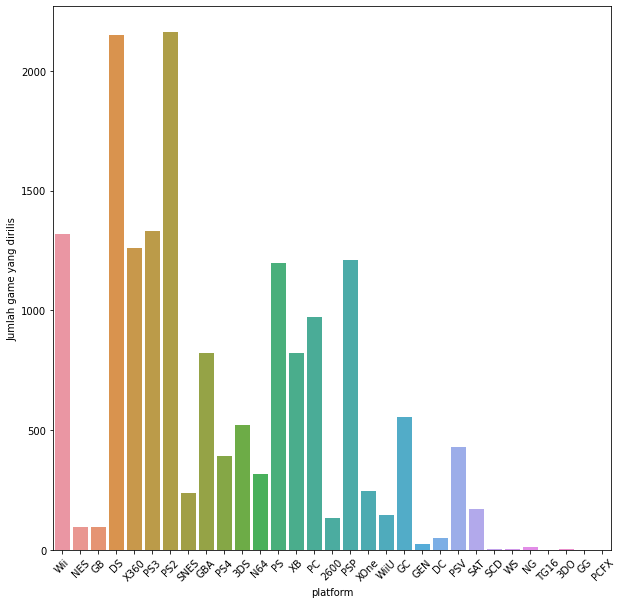

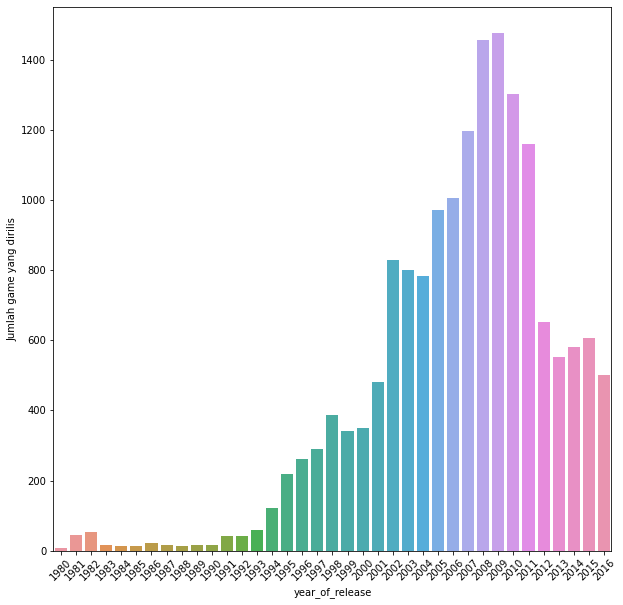

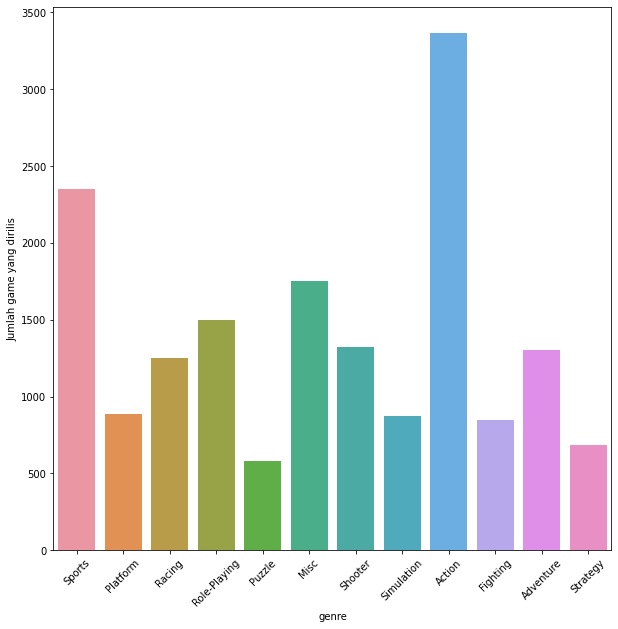

In [31]:
category_column = ['platform', 'year_of_release', 'genre']

# Loop through the column names
for column in category_column:

    # Create a bar plot with the counts of each category in the column
    plt.figure(figsize=(10, 10))
    sns.countplot(x=column, data=data)

    # Add x-axis label
    plt.xlabel(column)
    plt.xticks(rotation=45)

    # Add y-axis label
    plt.ylabel('Jumlah game yang dirilis')

    plt.show()

**Kesimpulan Sementara:**

* Melalui diagram histogram, terlihat bahwa terjadi peningkatan jumlah game yang dirilis dari waktu ke waktu, dengan puncak tertinggi terjadi pada tahun 2008.
* Platform game yang memiliki jumlah game yang telah dirilis terbanyak adalah DS (Nintendo DS) dan PS2 (PlayStation 2).
* Genre game yang paling banyak dirilis adalah genre Action.

### 2.3. Penjualan Berdasarkan Platform

In [32]:
# Checking platform with most sales
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)
platform_sales.reset_index().head()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


**Kesimpulan Sementara:**

* Berdasarkan total penjualan, game pada platform PS2 memiliki total penjualan tertinggi sebesar 1255.77 juta USD.

**Analisa** distribusi PS2

In [33]:
# Query PS2
platform_ps2 = data.query('platform in ("PS2")')
platform_ps2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16668,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unidentified,0.01
16669,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unidentified,0.01
16681,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unidentified,0.01
16687,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unidentified,0.01


In [34]:
# Calculate total sales of PS2 per year
platform_ps2.groupby('year_of_release')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,year_of_release,total_sales
4,2004,211.81
2,2002,205.38
3,2003,184.31
5,2005,182.87
1,2001,166.43
6,2006,103.42
7,2007,75.99
8,2008,53.90
0,2000,39.17
9,2009,26.40


**Kesimpulan Sementara:**

* Berdasarkan total penjualan game pada platform PS2, tahun 2004 mencatat total penjualan tertinggi sebesar 211.81 juta USD.
* Meskipun penjualan PS2 mencatat angka tertinggi, namun penjualan tersebut hanya terjadi dari tahun 2000 hingga tahun 2011. Tidak ada penjualan game yang tercatat pada periode 2012 hingga 2016.

**Analisa** distribusi X360 dan PS3

In [35]:
# Query X360
platform_x360 = data.query('platform in ("X360")')
platform_x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16611,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16620,World Snooker Championship 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unidentified,0.01
16645,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01
16652,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01


In [36]:
# Calculate total sales of X360 per year
platform_x360.groupby('year_of_release')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,year_of_release,total_sales
5,2010,180.21
6,2011,143.84
3,2008,135.26
4,2009,120.29
7,2012,99.74
2,2007,95.41
8,2013,88.58
1,2006,51.62
9,2014,34.74
10,2015,11.96


In [37]:
# Query PS3
platform_ps3 = data.query('platform in ("PS3")')
platform_ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
...,...,...,...,...,...,...,...,...,...,...,...,...
16637,WSC REAL 09: World Snooker Championship,PS3,2009,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unidentified,0.01
16672,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unidentified,0.01
16674,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,unidentified,0.00
16689,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unidentified,0.01


In [38]:
# Calculate total sales of PS3 per year
platform_ps3.groupby('year_of_release')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,year_of_release,total_sales
5,2011,165.09
4,2010,142.17
3,2009,130.93
2,2008,118.52
7,2013,113.25
6,2012,107.36
1,2007,73.19
8,2014,47.76
0,2006,20.96
9,2015,16.82


**Kesimpulan Sementara:**

* Setelah dilakukan analisis distribusi, platform terbaru yaitu X360 (Xbox 360) dan PS3 (PlayStation 3) juga menduduki posisi kedua dan ketiga dalam hal penjualan terbesar. Penjualan X360 terjadi dari tahun 2005 hingga 2016, sementara penjualan PS3 terjadi dari tahun 2006 hingga 2016.
* Berdasarkan total penjualan game di platform X360, tahun 2010 mencatat total penjualan tertinggi sebesar 170.03 juta USD. Namun, pada tahun 2016, penjualan game di platform tersebut hanya mencapai 1.52 juta USD.
* Berdasarkan total penjualan game di platform PS2, tahun 2011 mencatat total penjualan tertinggi sebesar 156.78 juta USD. Namun, pada tahun 2016, penjualan game di platform tersebut hanya mencapai 3.60 juta USD.
* Melihat perbandingan distribusi data tersebut, terlihat bahwa platform PS2 mulai terlupakan dan digantikan oleh X360 dan PS3 yang memiliki penjualan yang lebih tinggi.

**Kesimpulan:**

* Meskipun penjualan PS2 merupakan yang tertinggi dari keseluruhan penjualan, namun penjualan tersebut berhenti pada tahun 2011.
* Jika dilihat dari tahun game pertama dirilis, terlihat bahwa dibutuhkan sekitar 5-6 tahun untuk platform baru muncul.
* Game pertama X360 dirilis pada tahun 2005 dan game pertama PS3 dirilis pada tahun 2006. Periode sekitar 7 tahun (2005-2011) diperlukan untuk menggantikan popularitas PS2 dengan X360. Sementara itu, PS3 memerlukan waktu sekitar 6 tahun (2006-2011) sebagai generasi penerusnya.

### 2.4. Penjualan Terbanyak Pada Tahun 2013-2016

Berdasarkan analisis sebelumnya, diperlukan waktu sekitar 12 tahun bagi platform seperti PS2 untuk mempertahankan popularitasnya sebelum akhirnya digantikan oleh platform baru. Oleh karena itu, untuk kasus X360 atau PS3 kemungkinan akan terjadi hal yang sama, dengan perkiraan bahwa pada tahun 2017 platform tersebut akan mulai memudar popularitasnya. Sebagai acuan awal, tahun 2013 dipilih sebagai titik perbandingan.

In [39]:
# Creates a slice of rows where the year of release is 2013 and above 
new_data = data.query('year_of_release >= 2013')

In [40]:
# Checking platform with most sales
platform_sales_new = new_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)
platform_sales_new.reset_index().head()

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,144.44
4,X360,136.80


**Kesimpulan Sementara:**

* Setelah dilakukan slice pada tahun 2013 hingga 2016, terlihat bahwa penjualan X360 mulai mengalami penurunan dan digantikan oleh generasi baru yaitu XOne. Namun, dalam kasus ini, penjualan pada platform PS3 masih berada di posisi kedua setelah PS4 yang memiliki penjualan tertinggi.
* Penjualan pada platform PS4 mencapai angka yang tinggi dengan total penjualan sebesar 314.14 juta USD, dibandingkan dengan pesaingnya yaitu XOne yang hanya mencapai 159.32 juta USD. Hal ini menunjukkan bahwa platform PS4 memiliki potensi yang besar dalam menghasilkan keuntungan.

### 2.5. Penjualan Global Semua Game Berdasarkan Platform Pada Tahun 2013-2016

In [41]:
new_data.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9945,Tropico 5,PC,2014,Simulation,0.02,0.09,0.00,0.01,75.0,7.0,T,0.12
1816,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,0.53,0.33,0.17,0.08,73.0,7.6,E,1.11
10424,Kamen Rider: Battride War II,PS3,2014,Action,0.00,0.00,0.10,0.00,NaN,NaN,unidentified,0.10


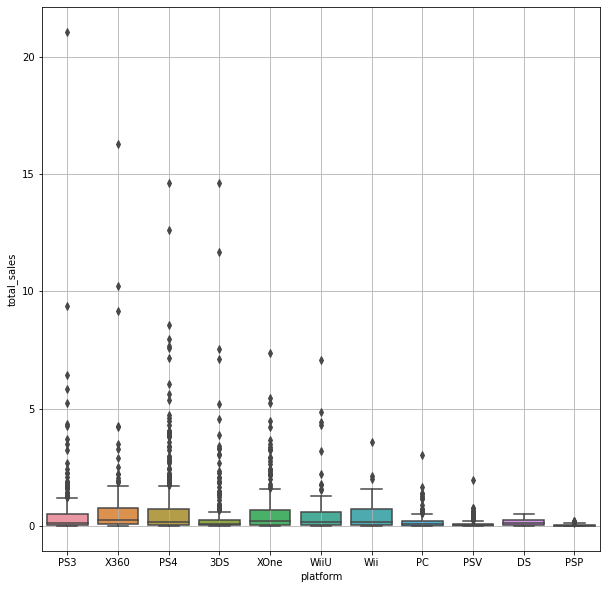

In [42]:
# Create a boxplot using seaborn
plt.figure(figsize=(10,10))
sns.boxplot(x='platform', y='total_sales', data=new_data)
plt.grid(True)
plt.show()

In [43]:
# Pivot table about avg game platform total sales
avg_platform_sales = new_data.pivot_table(values='total_sales', 
                                       index='platform',
                                       aggfunc=['mean', 'count'])
avg_platform_sales.columns = ['avg_sales', 'total_game']

In [44]:
avg_platform_sales.sort_values('avg_sales', ascending=False)

,avg_sales,total_game
platform,,
PS4,0.801378,392
X360,0.735484,186
XOne,0.645020,247
Wii,0.593913,23
WiiU,0.562000,115
PS3,0.525884,345
3DS,0.464437,311
PC,0.208624,189
DS,0.192500,8


**Kesimpulan:**

* Berdasarkan grafik boxplot, tidak terlihat adanya perbedaan drastis antara rata-rata penjualan. Analisis data secara statistik juga menunjukkan bahwa tidak ada perbedaan yang signifikan.
* Platform PS4 memiliki rata-rata penjualan tertinggi dan juga memiliki jumlah game terbanyak, yaitu sebanyak 392 game.

### 2.6. Korelasi Penjualan dan Ulasan Pada Tahun 2013-2016

In [45]:
# Filter to PS4 only
ps4_sales = new_data[new_data['platform'] == 'PS4']

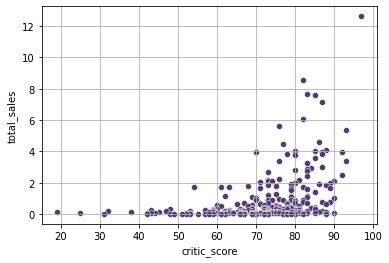

In [46]:
# Scatterplot for critic score
sns.scatterplot(x="critic_score", y="total_sales", data=ps4_sales, color='#533A71')
plt.grid(True)
plt.show()

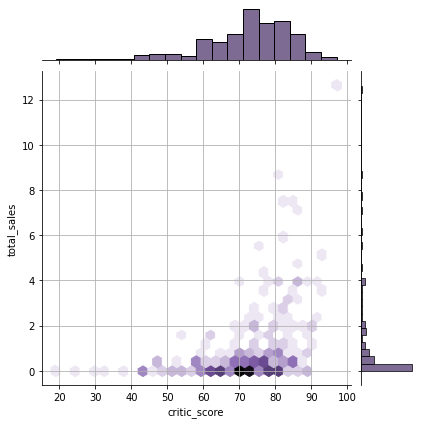

In [47]:
# Hexbinplot for critic score
sns.jointplot(x='critic_score', y='total_sales', data=ps4_sales, kind='hex', color='#533A71')
plt.grid(True)
plt.show()

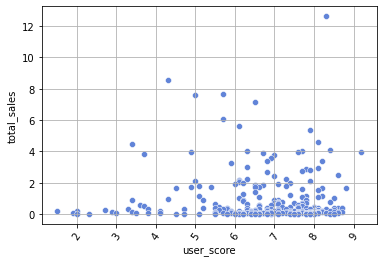

In [48]:
# Scatterplot for user score
sns.scatterplot(x="user_score", y="total_sales", data=ps4_sales, color='#6184D8')
plt.xticks(rotation=55)
plt.grid(True)
plt.show()

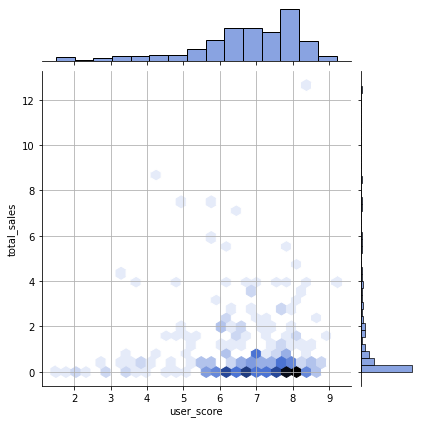

In [49]:
# Hexbinplot for user score
sns.jointplot(x='user_score', y='total_sales', data=ps4_sales, kind='hex', color='#6184D8')
plt.grid(True)
plt.show()

In [50]:
# Correlation between total sales and critic score
ps4_sales['total_sales'].corr(ps4_sales['critic_score'])

0.406567902061781

In [51]:
# Correlation  between total sales and user score
ps4_sales['total_sales'].corr(ps4_sales['user_score'])

-0.031957110204556424

**Kesimpulan Sementara:**

* Berdasarkan grafik scatterplot dan hexbin, terlihat bahwa ulasan pengguna dan ulasan dari para profesional memiliki pengaruh yang kecil bahkan sangat kecil terhadap total penjualan pada platform PS4. Korelasi antara kedua variabel tersebut tampak mendekati 0.

PS4 akan dibandingkan dengan kompetitornya yaitu XOne.

In [52]:
# Filter to XOne only
xone_sales = new_data[new_data['platform'] == 'XOne']

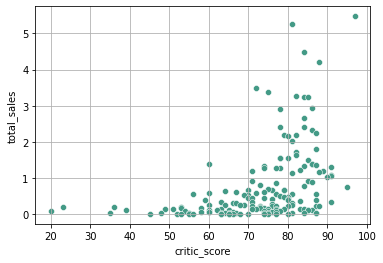

In [53]:
# Scatterplot for critic score
sns.scatterplot(x="critic_score", y="total_sales", data=xone_sales, color='#439A86')
plt.grid(True)
plt.show()

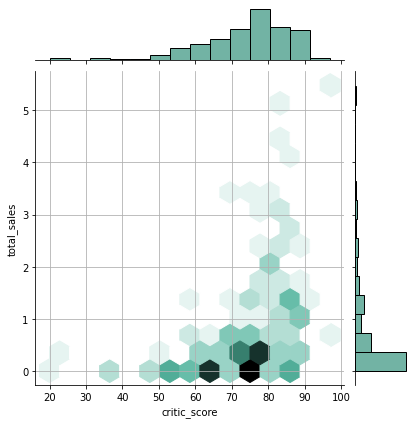

In [54]:
# Hexbinplot for critic score
sns.jointplot(x='critic_score', y='total_sales', data=xone_sales, kind='hex', color='#439A86')
plt.grid(True)
plt.show()

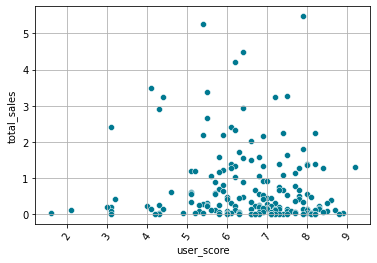

In [55]:
# Scatterplot for user score
sns.scatterplot(x="user_score", y="total_sales", data=xone_sales, color='#007991')
plt.xticks(rotation=55)
plt.grid(True)
plt.show()

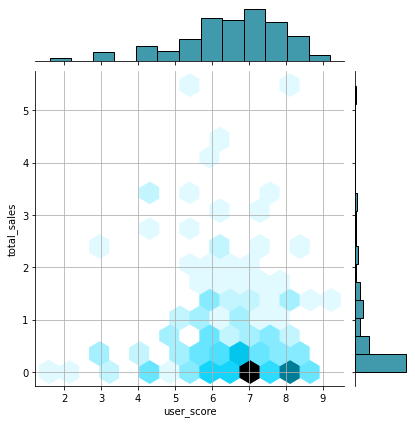

In [56]:
# Hexbinplot for user score
sns.jointplot(x='user_score', y='total_sales', data=xone_sales, kind='hex', color='#007991')
plt.grid(True)
plt.show()

In [57]:
# Correlation between total sales and critic score
xone_sales['total_sales'].corr(xone_sales['critic_score'])

0.41699832800840175

In [58]:
# Correlation  between total sales and user score
xone_sales['total_sales'].corr(xone_sales['user_score'])

-0.06892505328279412

**Kesimpulan:**

* Berdasarkan grafik scatterplot dan hexbin, terlihat bahwa ulasan pengguna dan ulasan dari para profesional memiliki pengaruh yang kecil bahkan sangat kecil terhadap total penjualan pada platform XOne. Korelasi antara kedua variabel tersebut tampak mendekati 0.
* Tidak terdapat perbedaan yang signifikan antara PS4 dan XOne dalam hal ulasan pengguna atau ulasan dari para profesional, serta tidak ada korelasi yang signifikan antara kedua faktor tersebut dengan total penjualan.

### 2.7. Analisis Distribusi Game Berdasarkan Genre pada Tahun 2013-2016

In [59]:
top_genre = new_data['genre'].value_counts().sort_values(ascending=False)
top_genre.reset_index()

,index,genre
0,Action,767
1,Role-Playing,294
2,Adventure,246
3,Sports,215
4,Shooter,188
5,Misc,155
6,Racing,86
7,Fighting,80
8,Platform,74
9,Simulation,64


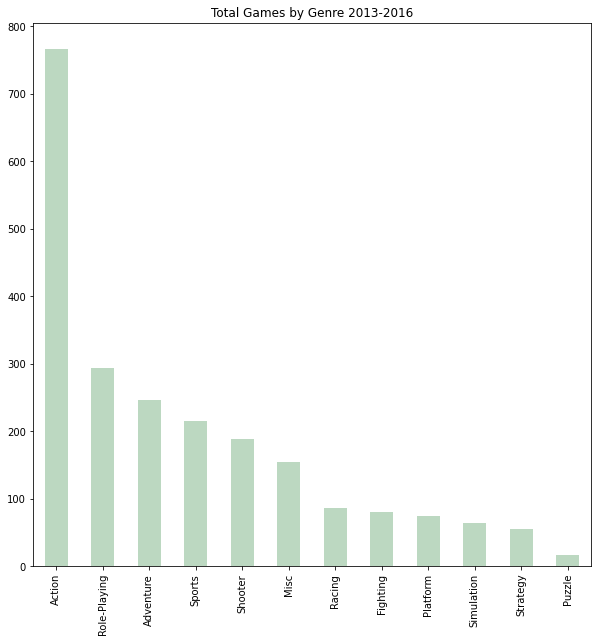

In [60]:
# Create a bar plot
plt.figure(figsize=(10,10))
top_genre.plot.bar(color='#BCD8C1')
plt.title('Total Games by Genre 2013-2016')
plt.show()

**Kesimpulan Sementara:**

* Pada rentang tahun 2013-2016, genre Action memiliki jumlah game yang telah dirilis terbanyak, diikuti oleh genre Role-Playing dan Adventure. Namun, game dengan genre Puzzle hanya memiliki jumlah game yang terbatas, yaitu hanya 17 game yang dirilis selama empat tahun terakhir tersebut.

In [61]:
genre_sales = new_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales.reset_index()

,genre,total_sales
0,Action,322.27
1,Shooter,233.05
2,Sports,150.67
3,Role-Playing,146.18
4,Misc,62.82
5,Platform,42.63
6,Racing,39.98
7,Fighting,35.31
8,Adventure,23.73
9,Simulation,22.25


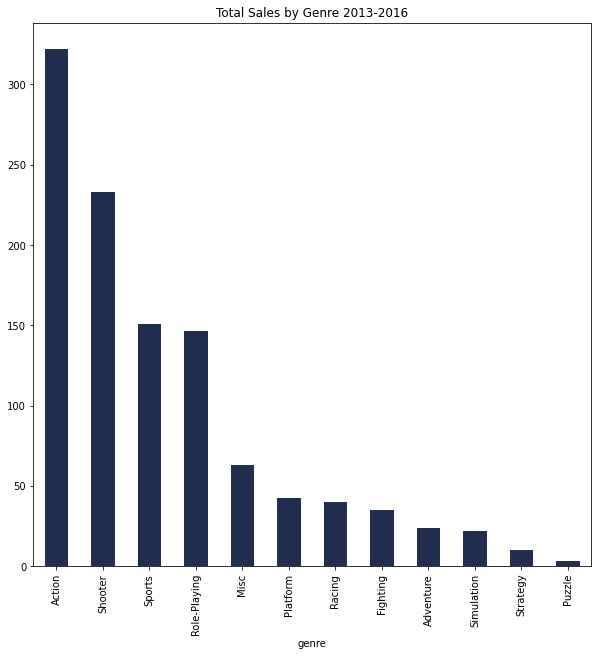

In [62]:
# Create a bar plot
plt.figure(figsize=(10,10))
genre_sales.plot.bar(color='#222E50')
plt.title('Total Sales by Genre 2013-2016')
plt.show()

**Kesimpulan:**

* Pada rentang tahun 2013-2016, genre yang paling menguntungkan adalah game dengan genre Action, diikuti oleh genre Shooter (FPS).
* Genre Action memiliki total penjualan tertinggi yaitu 321.87 juta USD dan jumlah game terbanyak sebanyak 766. Meskipun genre Role-Playing memiliki game terbanyak kedua dengan 292 game, namun penjualan tertinggi kedua ditempati oleh genre Shooter dengan 232.98 juta USD meskipun hanya memiliki 187 game.
* Genre Shooter memiliki potensi penjualan yang tinggi meskipun jumlah game yang dirilis tidak terlalu banyak, karena total penjualannya mencapai angka yang signifikan.

### 2.8. Profil Pengguna Wilayah (NA, EU, JP) Pada Tahun 2013-2016

**Berdasarkan Platform**

In [63]:
# User profile by platform in NA
profil_na = new_data.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
profil_na['market_share'] = (profil_na['na_sales']/profil_na['na_sales'].sum()) * 100
profil_na.head()

,platform,na_sales,market_share
4,PS4,108.74,24.789131
10,XOne,93.12,21.228286
9,X360,81.66,18.615784
3,PS3,63.50,14.475904
0,3DS,39.04,8.899831


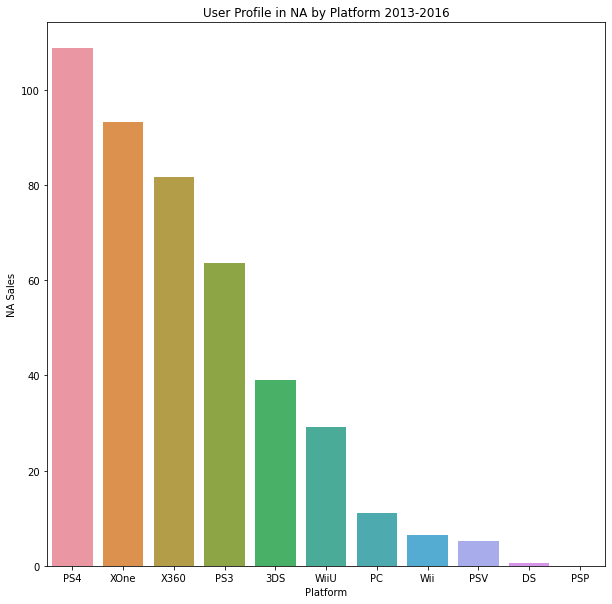

In [64]:
# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='platform', y='na_sales', data=profil_na)
plt.title('User Profile in NA by Platform 2013-2016')
plt.xlabel('Platform')
plt.ylabel('NA Sales')
plt.show()

In [65]:
#  User profile by platform in EU
profil_eu = new_data.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
profil_eu['market_share'] = (profil_eu['eu_sales']/profil_eu['eu_sales'].sum()) * 100
profil_eu.head()

,platform,eu_sales,market_share
4,PS4,141.09,35.947413
3,PS3,67.81,17.276873
10,XOne,51.59,13.144284
9,X360,42.52,10.833397
0,3DS,31.17,7.941604


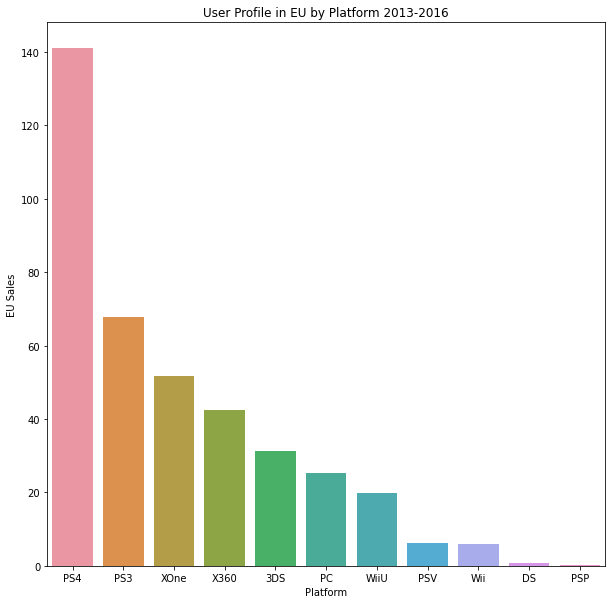

In [66]:
# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='platform', y='eu_sales', data=profil_eu)
plt.title('User Profile in EU by Platform 2013-2016')
plt.xlabel('Platform')
plt.ylabel('EU Sales')
plt.show()

In [67]:
# User profile by platform in JP
profil_jp = new_data.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
profil_jp['market_share'] = (profil_jp['jp_sales']/profil_jp['jp_sales'].sum()) * 100
profil_jp.head()

,platform,jp_sales,market_share
0,3DS,67.86,48.161817
3,PS3,23.35,16.572037
6,PSV,18.66,13.243435
4,PS4,15.96,11.327182
8,WiiU,10.88,7.721789


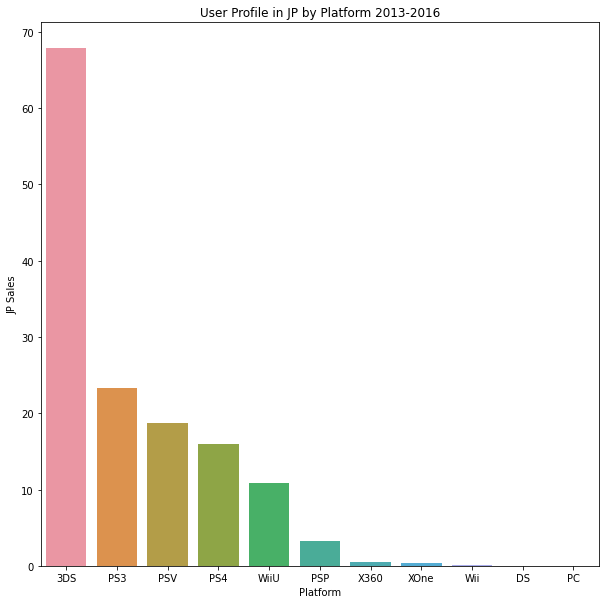

In [68]:
# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='platform', y='jp_sales', data=profil_jp)
plt.title('User Profile in JP by Platform 2013-2016')
plt.xlabel('Platform')
plt.ylabel('JP Sales')
plt.show()

**Kesimpulan:**

* Di wilayah NA, lima platform game teratas adalah PS4, XOne, X360, PS3, dan 3DS.
* Di wilayah EU, lima platform game teratas adalah PS4, PS3, XOne, X360, dan 3DS.
* Di wilayah JP, lima platform game teratas adalah 3DS, PS3, PSV, PS4, dan WiiU.
* Pangsa pasar game berbeda-beda di setiap wilayah, dengan penjualan terbesar terjadi di wilayah EU dan penjualan terendah terjadi di wilayah JP. Faktor bahasa dan preferensi lokal dapat mempengaruhi perbedaan ini.

**Berdasarkan Genre**

In [69]:
# Function for user profile by genre in each area
def sales_genre_area(area):
    df = new_data.groupby('genre')[area].sum().reset_index().sort_values(by=area, ascending=False)
    df['market_share'] = df[area]/df[area].sum() * 100
    return df.head()

In [70]:
# User profile by platform in NA
check_na = sales_genre_area('na_sales')
check_na

,genre,na_sales,market_share
0,Action,126.23,28.776273
8,Shooter,109.78,25.026216
10,Sports,65.27,14.879405
7,Role-Playing,46.51,10.602745
3,Misc,27.49,6.266813


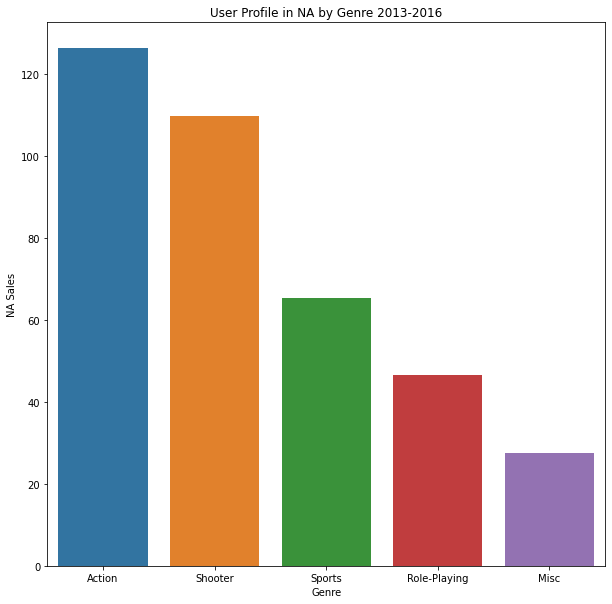

In [71]:
# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='genre', y='na_sales', data=check_na)
plt.title('User Profile in NA by Genre 2013-2016')
plt.xlabel('Genre')
plt.ylabel('NA Sales')
plt.show()

In [72]:
# User profile by platform in EU
check_eu = sales_genre_area('eu_sales')
check_eu

,genre,eu_sales,market_share
0,Action,118.32,30.145991
8,Shooter,87.88,22.390379
10,Sports,60.52,15.419501
7,Role-Playing,37.02,9.432087
6,Racing,20.19,5.144080


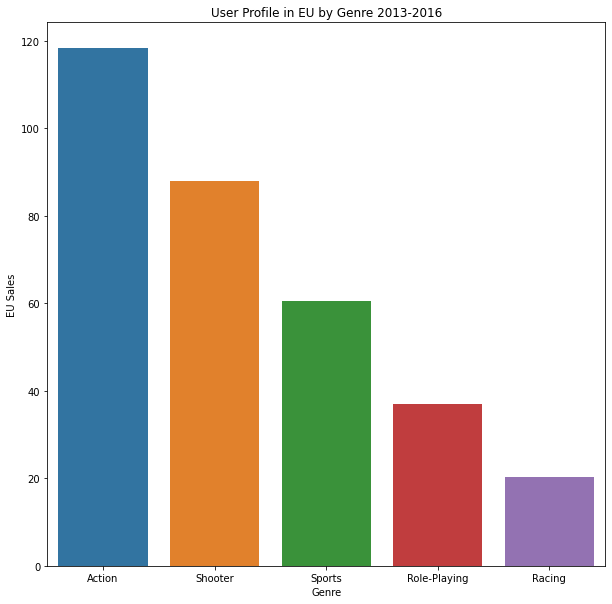

In [73]:
# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='genre', y='eu_sales', data=check_eu)
plt.title('User Profile in EU by Genre 2013-2016')
plt.xlabel('Genre')
plt.ylabel('EU Sales')
plt.show()

In [74]:
# User profile by platform in JP
check_jp = sales_genre_area('jp_sales')
check_jp

,genre,jp_sales,market_share
7,Role-Playing,51.14,36.295245
0,Action,40.49,28.736693
3,Misc,9.20,6.529454
2,Fighting,7.65,5.429383
8,Shooter,6.61,4.691270


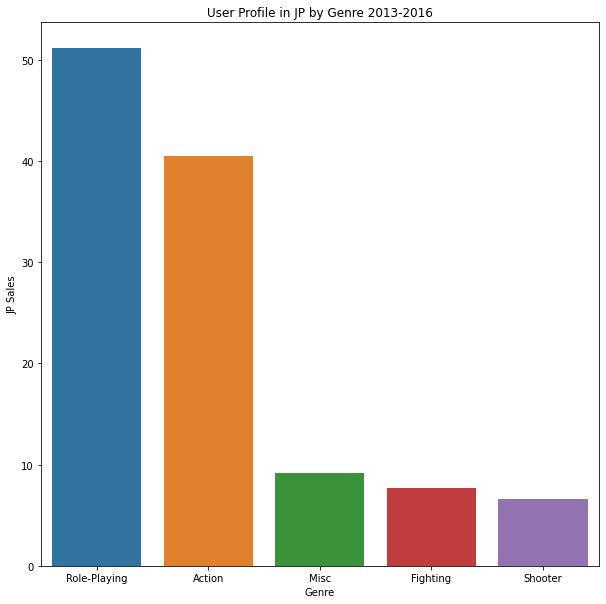

In [75]:
# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='genre', y='jp_sales', data=check_jp)
plt.title('User Profile in JP by Genre 2013-2016')
plt.xlabel('Genre')
plt.ylabel('JP Sales')
plt.show()

**Kesimpulan:**

* Genre teratas di wilayah NA adalah Action, diikuti oleh Shooter, Sports, Role-Playing, dan Misc.
* Genre teratas di wilayah EU adalah Action, diikuti oleh Shooter, Sports, Role-Playing, dan Racing.
* Genre teratas di wilayah JP adalah Role-Playing, diikuti oleh Action, Misc, Fighting, dan Shooter.
* Variasi pangsa pasar genre game dari satu wilayah ke wilayah lainnya cukup signifikan. Genre action memiliki penjualan yang cukup tinggi di wilayah NA dan EU, sedangkan genre role-playing sangat diminati di wilayah JP.

**Berdasarkan Rating**

Keterangan rating ESRB :

* EC : Early Childhood (anak-anak dibawah umur)
* E : Everyone (semua orang)
* E10+ : Everyone (umur sepuluh tahun keatas)
* T : Teen (umur 13 tahun keatas)
* M : Mature (umur 17 tahun keatas)
* K-A : Kids to Adults (anak-anak hingga dewasa)
* AO : Adults Only (umur 18 tahun keatas)
* RP : Rating Pending (masih dalam penundaan pihak ESRB)
* unidentified : tidak teridentifikasi

In [76]:
# Function for user profile by genre in each area
def sales_rating_area(area):
    df_1 = new_data.groupby('rating')[area].sum().reset_index().sort_values(by=area, ascending=False)
    df_1['market_share'] = df_1[area]/df_1[area].sum() * 100
    return df_1.head()

In [77]:
# User profile by rating in NA
rating_na = sales_rating_area('na_sales')
rating_na

,rating,na_sales,market_share
2,M,165.21,37.662426
4,unidentified,89.70,20.448639
0,E,79.17,18.048147
1,E10+,54.50,12.424201
3,T,50.08,11.416587


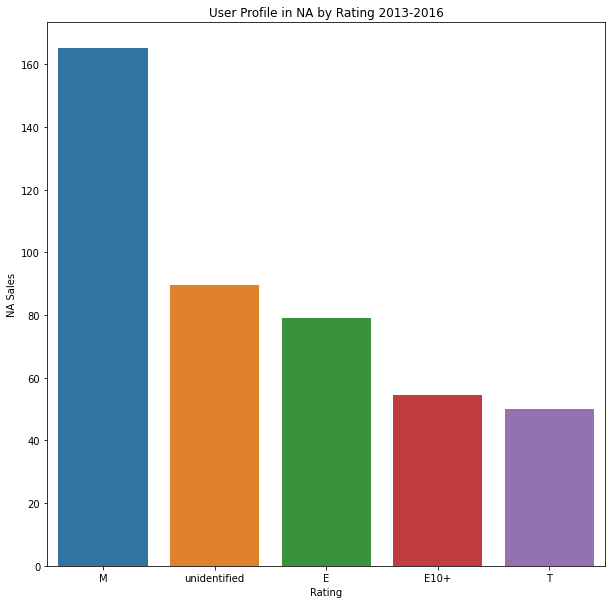

In [78]:
# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='rating', y='na_sales', data=rating_na)
plt.title('User Profile in NA by Rating 2013-2016')
plt.xlabel('Rating')
plt.ylabel('NA Sales')
plt.show()

In [79]:
# User profile by rating in EU
rating_eu = sales_rating_area('eu_sales')
rating_eu

,rating,eu_sales,market_share
2,M,145.32,37.025147
0,E,83.38,21.243853
4,unidentified,78.91,20.104971
1,E10+,42.88,10.925119
3,T,42.00,10.700910


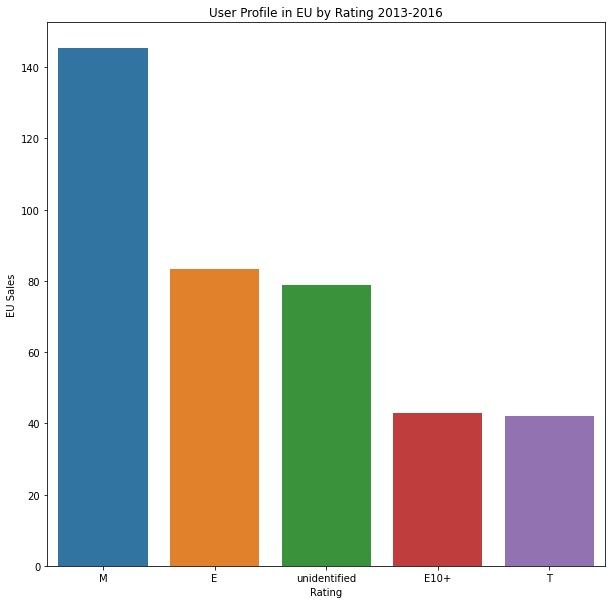

In [80]:
# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='rating', y='eu_sales', data=rating_eu)
plt.title('User Profile in EU by Rating 2013-2016')
plt.xlabel('Rating')
plt.ylabel('EU Sales')
plt.show()

In [81]:
# User profile by rating in JP
rating_jp = sales_rating_area('jp_sales')
rating_jp

,rating,jp_sales,market_share
4,unidentified,85.10,60.397445
3,T,20.66,14.662881
0,E,15.14,10.745209
2,M,14.11,10.014194
1,E10+,5.89,4.180270


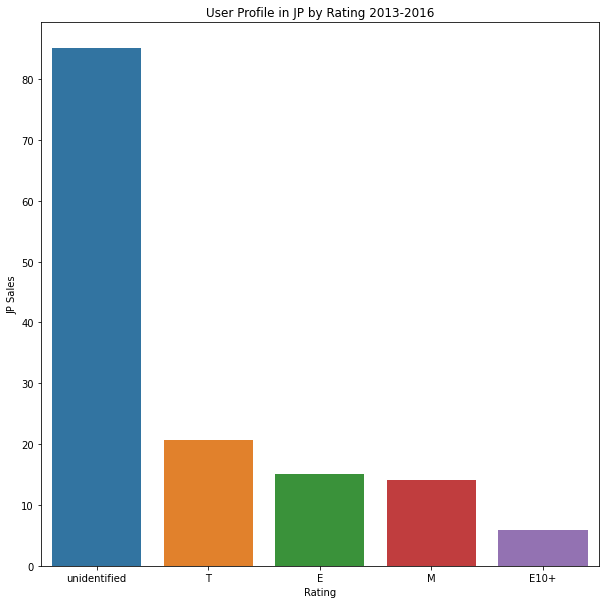

In [82]:
# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='rating', y='jp_sales', data=rating_jp)
plt.title('User Profile in JP by Rating 2013-2016')
plt.xlabel('Rating')
plt.ylabel('JP Sales')
plt.show()

**Kesimpulan:**

* Penjualan game dengan rating mature memiliki dominasi penjualan tertinggi di wilayah NA dan EU, sementara di wilayah JP penjualannya tidak teridentifikasi. Perbandingan tersebut cukup signifikan dibandingkan dengan rating Teen yang menduduki peringkat kedua.
* Kemungkinan besar penjualan game dengan rating mempengaruhi perbedaan market share antara wilayah dan genre yang terlihat.

## 3. Analisis Data Statistik (Hypothesis Testing)

### 3.1. Menguji Hipotesis

**Hipotesis Pertama:**

**Rata-rata rating pengguna platform Xbox One dan PC adalah sama.**

Dalam uji variansi, jika perbandingan rasio sampel dengan varians yang lebih besar dibandingkan dengan sampel yang variansnya lebih kecil <4, maka dapat diasumsikan bahwa kedua varians tersebut setara. Selain itu, uji Levene juga dapat digunakan dengan hipotesis nol bahwa kedua kelompok memiliki varians yang setara, dan hipotesis alternatif bahwa kedua kelompok memiliki varians yang berbeda. Jika hasil uji Levene menunjukkan nilai p-value < nilai kritis (alpha), maka hipotesis nol dapat ditolak, dan sebaliknya.

Sebelum melakukan analisis data hipotesis, penting untuk menangani nilai NaN terlebih dahulu. Hal ini perlu dilakukan karena saat melakukan uji Levene dan t-test, keberadaan nilai NaN dapat mengganggu proses pengujian dan menyebabkan hasil yang tidak valid. Oleh karena itu, langkah-langkah untuk menangani nilai NaN perlu dilakukan sebelum melanjutkan analisis data hipotesis.

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


nan values akan di drop

In [84]:
# Drop the nan values in user_score
data = data.dropna(subset=['user_score'])

In [85]:
# Query XOne
platform_xone = data.query('platform in ("XOne")')
platform_xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16542,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,6.8,T,0.01
16595,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16628,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16641,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01


In [86]:
# Query PC
platform_pc = data.query('platform in ("PC")')
platform_pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,8.01
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.00,0.00,93.0,7.3,T,6.29
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.00,0.54,88.0,4.0,M,5.14
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.00,0.58,93.0,8.2,T,4.83
284,Half-Life,PC,1997,Shooter,4.03,0.00,0.09,0.00,96.0,9.1,M,4.12
...,...,...,...,...,...,...,...,...,...,...,...,...
16679,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A,0.01
16690,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16694,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
16700,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


In [87]:
# Create a sample for levene test
sample_1 = platform_xone['user_score']
sample_2 = platform_pc['user_score']

In [88]:
# Levene test
st.levene(sample_1, sample_2)

LeveneResult(statistic=1.2212506384014863, pvalue=0.2693951512047048)

Dengan mempertimbangkan hasil uji Levene, dimana p-value lebih besar dari nilai kritis (alpha = 0.05), kita tidak dapat menolak hipotesis nol (H0). Ini menunjukkan bahwa kedua sampel memiliki varians yang sama (equal_var = True) dan dapat digunakan dalam analisis data hipotesis yang mengasumsikan varians setara.

* H0 (Null Hypothesis) : Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
* H1 (Alternative Hypothesis) : Rata-rata rating pengguna platform Xbox One dan PC adalah berbeda.

In [89]:
# ttest_ind for sample 1 and 2
alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  1.3896435533548819e-05
Kita menolak hipotesis nol


**Hipotesis Kedua:**

**Rata-rata rating pengguna genre Action dan Sports berbeda.**

Jika nilai p-value yang dihasilkan dari uji Levene lebih kecil dari nilai kritis (alpha), kita dapat menolak hipotesis nol (H0), yang berarti kedua grup memiliki varians yang berbeda. Jika nilai p-value lebih besar atau sama dengan nilai kritis, kita tidak dapat menolak H0 dan menyimpulkan bahwa kedua grup memiliki varians yang setara.

In [90]:
# Create a sample for levene test
sample_3 = data.loc[data['genre'] == 'Action', 'user_score']
sample_4 = data.loc[data['genre'] == 'Sports', 'user_score']

In [91]:
# Levene test
st.levene(sample_3, sample_4)

LeveneResult(statistic=14.132896085177192, pvalue=0.0001736640672727649)

Dengan nilai p-value yang lebih kecil dari nilai kritis (alpha), kita dapat menolak hipotesis nol (H0) dan menyimpulkan bahwa kedua sampel memiliki varians yang berbeda (equal_var = False).

* H0 (Null Hypothesis) : Rata-rata rating pengguna genre Action dan Sports sama.
* H1 (Alternative Hypothesis) : Rata-rata rating pengguna genre Action dan Sports berbeda.

In [92]:
# ttest_ind for sample 3 and 4
alpha = 0.05

results = st.ttest_ind(sample_3, sample_4, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  0.11483818791498286
Kita tidak dapat menolak hipotesis nol


**Kesimpulan:**

* Dari hasil uji hipotesis pertama, dapat disimpulkan bahwa hipotesis yang menyatakan rata-rata rating pengguna platform Xbox One dan PC adalah sama (H0) tidak dapat diterima atau tidak benar.
* Dari hasil uji hipotesis kedua, dapat disimpulkan bahwa hipotesis yang menyatakan rata-rata rating pengguna genre Action dan Sports berbeda (H1) tidak dapat diterima atau tidak benar.

Selanjutnya akan diuji apakah hal tersebut berlaku terhadap data 2013-2016 atau tidak.

**Hipotesis Pertama 2013-2016:**

**Rata-rata rating pengguna platform Xbox One dan PC adalah sama.**

Dalam hasil uji Levene, jika p-value lebih kecil dari nilai kritis (alpha), maka kita dapat menolak hipotesis nol (H0) yang menyatakan bahwa kedua grup memiliki varians setara. Sebaliknya, jika p-value lebih besar atau sama dengan nilai kritis (alpha), maka kita tidak dapat menolak H0 dan menganggap bahwa kedua grup memiliki varians yang setara.

nan values diisi dengan rata-rata

In [93]:
fill_data = new_data.copy()

In [94]:
# Drop the missing values
fill_data = fill_data.dropna(subset=['user_score'])

In [95]:
# Query XOne 2013-2016
new_platform_xone = fill_data.query('platform in ("XOne")')
new_platform_xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16542,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,6.8,T,0.01
16595,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16628,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16641,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01


In [96]:
# Query PC 2013-2016
new_platform_pc = fill_data.query('platform in ("PC")')
new_platform_pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1094,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
1350,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42
1436,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36
1529,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16454,Fallout Anthology,PC,2015,Action,0.00,0.01,0.0,0.00,NaN,8.3,unidentified,0.01
16461,TrackMania Turbo,PC,2016,Action,0.00,0.01,0.0,0.00,79.0,6.8,E,0.01
16507,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
16516,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,NaN,1.4,E,0.01


In [97]:
# Create a sample for levene test
sample_5 = new_platform_xone['user_score']
sample_6 = new_platform_pc['user_score']

In [98]:
# Levene test
st.levene(sample_5, sample_6)

LeveneResult(statistic=8.44812129543499, pvalue=0.003897553110130418)

Dengan p-value yang lebih kecil dari nilai kritis (alpha = 0.05), kita tidak dapat menolak hipotesis nol (H0) dan menyimpulkan bahwa kedua sampel memiliki varians yang berbeda (equal_var = False).

* H0 (Null Hypothesis) : Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
* H1 (Alternative Hypothesis) : Rata-rata rating pengguna platform Xbox One dan PC adalah berbeda.

In [99]:
# ttest_ind for sample 5 and 6
alpha = 0.05

results = st.ttest_ind(sample_5, sample_6, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  0.14759594013430463
Kita tidak dapat menolak hipotesis nol


**Hipotesis Kedua 2013-2016:**

**Rata-rata rating pengguna genre Action dan Sports berbeda.**

Dengan p-value yang lebih kecil dari nilai kritis (alpha), kita dapat menolak hipotesis nol (H0) dan menyimpulkan bahwa kedua grup memiliki varians yang berbeda.

In [100]:
# Create a sample for levene test
sample_7 = fill_data.loc[fill_data['genre'] == 'Action', 'user_score']
sample_8 = fill_data.loc[fill_data['genre'] == 'Sports', 'user_score']

In [101]:
# Levene test
st.levene(sample_7, sample_8)

LeveneResult(statistic=26.375781745225087, pvalue=3.9119413036239563e-07)

Berdasarkan hasil uji Levene, dengan p-value yang lebih kecil dari nilai kritis (alpha), kita dapat menolak hipotesis nol (H0) dan menyimpulkan bahwa kedua sampel memiliki varians yang berbeda (equal_var = False).

* H0 (Null Hypothesis) : Rata-rata rating pengguna genre Action dan Sports sama.
* H1 (Alternative Hypothesis) : Rata-rata rating pengguna genre Action dan Sports berbeda.

In [102]:
# ttest_ind for sample 7 and 8
alpha = 0.05

results = st.ttest_ind(sample_7, sample_8, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  1.4711831608728666e-20
Kita menolak hipotesis nol


**Kesimpulan:**

* Berdasarkan hasil uji hipotesis, kita dapat menyimpulkan bahwa rata-rata rating pengguna antara platform Xbox One dan PC pada periode tahun 2013-2016 adalah sama (H0 diterima).
*  Berdasarkan hasil uji hipotesis, dapat disimpulkan bahwa rata-rata rating pengguna antara genre Action dan Sports pada periode tahun 2013-2016 adalah berbeda secara signifikan (H0 diterima).

## Kesimpulan Umum

### A. Pra-pemrosesan

Dari eksplorasi pra-pemrosesan data, dapat disimpulkan bahwa:

1. Terdapat jumlah missing value yang signifikan pada kolom user_score dalam dataframe yang berisi data penjualan game tiap wilayah berdasarkan platform, yang dapat mempengaruhi hasil uji hipotesis.
2. Duplikat tidak ditemukan.
3. Telah dibuat perhitungan jumlah penjualan dari seluruh wilayah.

### B. Analisis Data Esksploratif (EDA)

Dari hasil analisis data esksploratif, dapat disimpulkan bahwa:

1. Dataframe keseluruhan terdiri dari 16.713 game yang dirilis dari tahun 1980 hingga 2016, dengan 31 jenis platform yang tercatat.
2. Jumlah game dirilis terbanyak terjadi pada tahun 2009, setelahnya terjadi penurunan jumlah game yang dirilis.
3. Genre game yang paling banyak dirilis adalah Action, diikuti oleh Sports.
4. Lima platform dengan penjualan game terbanyak sepanjang tahun adalah PS2, X360, PS3, Wii, dan DS.
5. Platform PS2, dengan total penjualan 1255.77 Juta USD, mencapai puncak penjualannya pada tahun 2004 sebelum mengalami penurunan dan berakhir pada tahun 2012.
6. Berdasarkan tren sebelumnya, umumnya diperlukan waktu sekitar 5-6 tahun bagi platform baru untuk muncul setelah game pertama dirilis.
7. Dilihat dari popularitas sebuah platform, umumnya diperlukan waktu sekitar 6-7 tahun bagi platform lama untuk memudar popularitasnya dan digantikan oleh platform baru yang muncul.
8. Berdasarkan analisis sebelumnya, platform-platform terkenal umumnya bertahan selama sekitar 12 tahun sebelum memudar popularitasnya. Dengan mengambil sampel dari tahun 2013-2016, terlihat bahwa platform terbaru pun akan mengalami penurunan popularitas. Oleh karena itu, pada tahun 2017, kemungkinan besar platform PS3/X360 akan memudar popularitasnya dan digantikan oleh platform baru.
9. Rata-rata penjualan game pada tahun 2013-2016 tidak menunjukkan perbedaan yang signifikan antara platform-platformnya, meskipun PS4 memiliki jumlah game terbanyak.
10. Ulasan pengguna dan ulasan profesional memiliki korelasi yang sangat kecil atau bahkan tidak signifikan dalam mempengaruhi penjualan game pada platform-platform tahun 2013-2016. 
11. Genre game yang paling menguntungkan pada tahun 2013-2016 adalah Action, dengan penjualan game yang cukup banyak. Namun, genre Shooter memiliki potensi penjualan yang lebih tinggi meskipun jumlah game yang dijual tidak sebanyak genre Action.
12. Profil pengguna tiap wilayah pada tahun 2013-2016 menunjukkan perbedaan yang signifikan. Wilayah NA dan EU lebih suka bermain game pada platform PS4, sedangkan di wilayah JP, preferensi utama adalah platform 3DS. Selain itu, dalam hal genre, NA dan EU cenderung lebih menyukai game bergenre Action daripada JP yang lebih suka genre Role-Playing. Terkait rating, pengguna di NA dan EU cenderung menyukai game dengan rating mature, sementara di JP rating tertinggi tidak teridentifikasi dan perlu diperhatikan.

### C. Analisis Data Statistik (Hypothesis Testing)

Dari hasil analisis pengujian hipotesis, dapat disimpulkan bahwa:

1. Hasil dari uji hipotesis pertama menunjukkan bahwa rata-rata rating pengguna platform Xbox One dan PC tidak sama. Sementara itu, hasil dari uji hipotesis kedua menunjukkan bahwa rata-rata rating pengguna genre Action dan Sports tidak berbeda.
2. Pada rentang tahun 2013-2016, hasil uji hipotesis menunjukkan bahwa rata-rata rating pengguna platform Xbox One dan PC sama, serta rata-rata rating pengguna genre Action dan Sports berbeda.